## Algorithm 1: Optimal Resource Allocation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def optimal_resource_allocation(resources, needs, distances, max_distance=None):
    """
    Allocate limited resources to locations based on need and accessibility.

    Args:
        resources: Total resources available to distribute
        needs: Array of needs per location (higher = more needed)
        distances: Matrix of distances between locations
        max_distance: Maximum service distance (optional)

    Returns:
        allocations: Array of allocated resources per location
    """
    print("Starting resource allocation algorithm...")
    n_locations = len(needs)

    # Normalize needs to sum to 1
    normalized_needs = needs / np.sum(needs)
    print(f"Normalized needs: min={normalized_needs.min():.4f}, max={normalized_needs.max():.4f}")

    # Calculate accessibility scores
    if max_distance is None:
        max_distance = np.median(distances)
        print(f"Using median distance ({max_distance:.2f}) as max_distance parameter")

    accessibility = np.zeros(n_locations)
    for i in range(n_locations):
        # Create a copy of the distances to avoid modifying the original
        dist_i = distances[i].copy()
        # Set self-distance to a very large number instead of infinity
        dist_i[i] = 9999999  # This avoids the infinity issue
        weight = np.exp(-dist_i / max_distance)
        accessibility[i] = np.sum(weight)

    # Normalize accessibility
    accessibility = accessibility / np.sum(accessibility)
    print(f"Accessibility scores: min={accessibility.min():.4f}, max={accessibility.max():.4f}")

    #CHANGE # Combine needs and accessibility (70% needs, 30% accessibility)
    combined_score = 0.7 * normalized_needs + 0.3 * accessibility
    combined_score = combined_score / np.sum(combined_score)

    # Allocate resources
    allocations = resources * combined_score

    # Round to integers
    allocations = np.round(allocations).astype(int)
    print(f"Initial allocation: {np.sum(allocations)} of {resources} resources")

    # Adjust for rounding errors
    diff = resources - np.sum(allocations)
    if diff > 0:
        # Allocate remaining resources to highest-need locations
        indices = np.argsort(normalized_needs)[::-1]
        for i in range(diff):
            allocations[indices[i % n_locations]] += 1
        print(f"Added {diff} remaining resources to highest-need locations")
    elif diff < 0:
        # Remove from lowest-need locations
        indices = np.argsort(normalized_needs)
        for i in range(abs(diff)):
            if allocations[indices[i % n_locations]] > 0:
                allocations[indices[i % n_locations]] -= 1
        print(f"Removed {abs(diff)} excess resources from lowest-need locations")

    print("Resource allocation complete")
    return allocations



In [ ]:
# Create test data for resource allocation
def create_allocation_example():
    print("Creating test data for resource allocation...")
    # Create 5 locations with varying needs
    n_locations = 5

    # Population at each location
    population = np.array([5000, 8000, 3000, 12000, 7000])

    # Need score (e.g., poverty rate from 0-1)
    need_scores = np.array([0.3, 0.5, 0.2, 0.7, 0.4])

    # Distance matrix between locations (in miles)
    distances = np.array([
        [0, 10, 15, 25, 20],  # Distances from location 0 to all others
        [10, 0, 12, 18, 15],  # Distances from location 1 to all others
        [15, 12, 0, 30, 10],  # Distances from location 2 to all others
        [25, 18, 30, 0, 12],  # Distances from location 3 to all others
        [20, 15, 10, 12, 0]   # Distances from location 4 to all others
    ])

    # Total resources to allocate (e.g., $10 million in community development funds)
    total_resources = 100

    print(f"Created data for {n_locations} locations with ${total_resources} to allocate")
    return population, need_scores, distances, total_resources



Creating test data for resource allocation...
Created data for 5 locations with $100 to allocate
Starting resource allocation algorithm...
Normalized needs: min=0.0952, max=0.3333
Using median distance (12.00) as max_distance parameter
Accessibility scores: min=0.1426, max=0.2346
Initial allocation: 101 of 100 resources
Removed 1 excess resources from lowest-need locations
Resource allocation complete


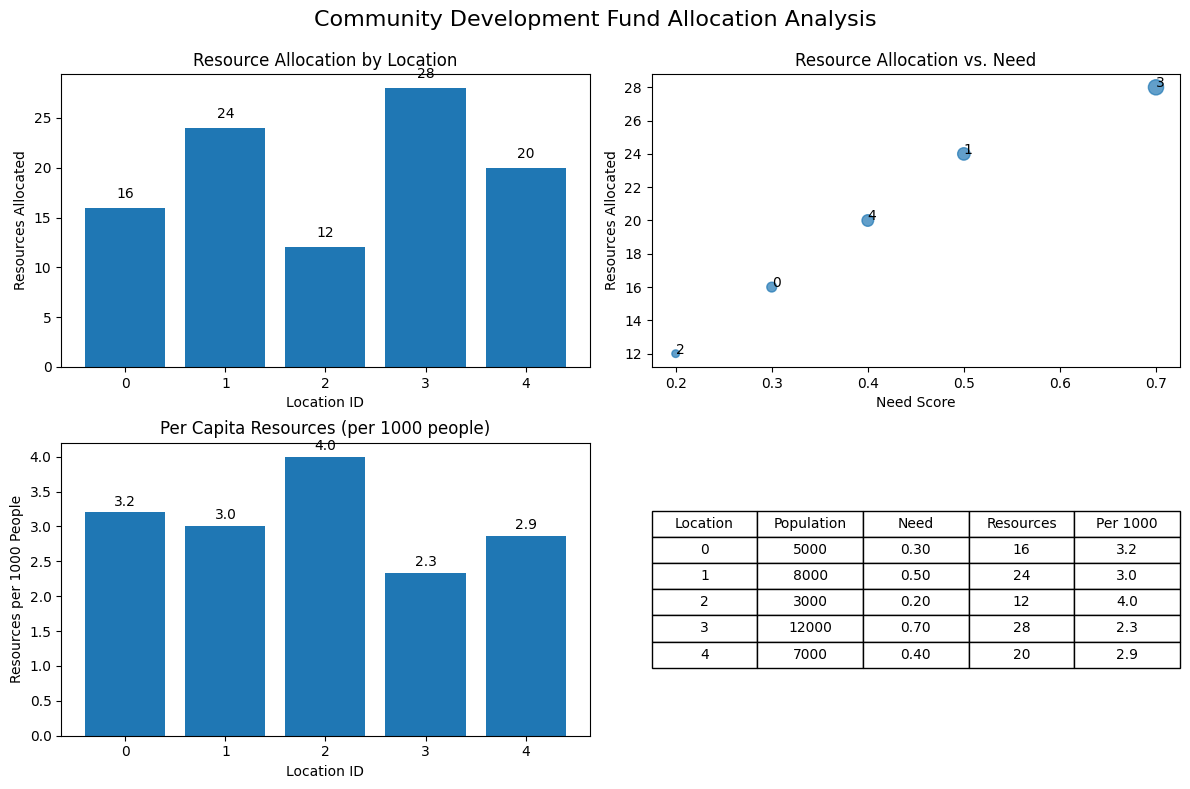


Allocation Summary:
Total Resources Allocated: 100
Correlation with Need Score: 0.9864
Per Capita Range: 2.33 to 4.00


In [ ]:
# Run the algorithm and visualize results
def run_allocation_example():
    # Get data
    population, need_scores, distances, total_resources = create_allocation_example()

    # Run allocation algorithm
    allocations = optimal_resource_allocation(total_resources, need_scores, distances)

    # Calculate per capita allocation for analysis
    per_capita = allocations / population * 1000  # Resources per 1000 people

    # Visualize results
    plt.figure(figsize=(12, 8))

    # Plot 1: Allocation by location
    plt.subplot(2, 2, 1)
    plt.bar(range(len(allocations)), allocations)
    plt.title('Resource Allocation by Location')
    plt.xlabel('Location ID')
    plt.ylabel('Resources Allocated')
    plt.xticks(range(len(allocations)))
    for i, v in enumerate(allocations):
        plt.text(i, v+1, str(v), ha='center')

    # Plot 2: Resources vs Need
    plt.subplot(2, 2, 2)
    plt.scatter(need_scores, allocations, s=population/100, alpha=0.7)
    plt.title('Resource Allocation vs. Need')
    plt.xlabel('Need Score')
    plt.ylabel('Resources Allocated')
    for i, txt in enumerate(range(len(allocations))):
        plt.annotate(txt, (need_scores[i], allocations[i]))

    # Plot 3: Per capita resources
    plt.subplot(2, 2, 3)
    plt.bar(range(len(per_capita)), per_capita)
    plt.title('Per Capita Resources (per 1000 people)')
    plt.xlabel('Location ID')
    plt.ylabel('Resources per 1000 People')
    plt.xticks(range(len(per_capita)))
    for i, v in enumerate(per_capita):
        plt.text(i, v+0.1, f"{v:.1f}", ha='center')

    # Plot 4: Table of values
    plt.subplot(2, 2, 4)
    plt.axis('off')
    table_data = [
        ["Location", "Population", "Need", "Resources", "Per 1000"],
    ]
    for i in range(len(allocations)):
        table_data.append([
            f"{i}",
            f"{population[i]}",
            f"{need_scores[i]:.2f}",
            f"{allocations[i]}",
            f"{per_capita[i]:.1f}"
        ])
    table = plt.table(cellText=table_data, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    plt.tight_layout()
    plt.suptitle('Community Development Fund Allocation Analysis', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

    # Print summary statistics
    print("\nAllocation Summary:")
    print(f"Total Resources Allocated: {np.sum(allocations)}")
    print(f"Correlation with Need Score: {np.corrcoef(need_scores, allocations)[0,1]:.4f}")
    print(f"Per Capita Range: {np.min(per_capita):.2f} to {np.max(per_capita):.2f}")

    return allocations, population, need_scores

# Run the example
if __name__ == "__main__":
    allocations, population, need_scores = run_allocation_example()

## Algorithm 2: Service Center Location Optimization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def clustering_based_service_locations(coordinates, num_centers, population_weights=None):
    """
    Find optimal service center locations using weighted k-means clustering.

    Args:
        coordinates: Array of coordinates for population points
        num_centers: Number of service centers to place
        population_weights: Weights for each coordinate

    Returns:
        center_locations: Coordinates of the recommended service centers
        assignments: Assigned center for each input coordinate
    """
    print("Starting service location clustering algorithm...")
    n_points = coordinates.shape[0]

    # If no weights provided, use equal weights
    if population_weights is None:
        print("No population weights provided. Using equal weights.")
        population_weights = np.ones(n_points)
    else:
        print(f"Using population weights (min={min(population_weights):.1f}, max={max(population_weights):.1f})")

    # Normalize weights
    weights = population_weights / np.sum(population_weights)

    # Initialize centers randomly
    np.random.seed(42)  # For reproducibility
    idx = np.random.choice(n_points, num_centers, replace=False)
    centers = coordinates[idx].copy()
    print(f"Initialized {num_centers} random center locations")

    # K-means iterations
    max_iterations = 100
    tolerance = 1e-4

    for iteration in range(max_iterations):
        # Calculate distances to centers
        distances = np.zeros((n_points, num_centers))
        for i in range(num_centers):
            distances[:, i] = np.sum((coordinates - centers[i])**2, axis=1)

        # Assign points to nearest center
        assignments = np.argmin(distances, axis=1)

        # Update centers
        new_centers = np.zeros_like(centers)
        for i in range(num_centers):
            mask = (assignments == i)
            if np.sum(mask) > 0:
                # Weighted average of points
                new_centers[i] = np.average(
                    coordinates[mask],
                    axis=0,
                    weights=weights[mask]
                )

        # Check convergence
        center_shift = np.sum((centers - new_centers)**2)
        centers = new_centers

        if center_shift < tolerance:
            print(f"Converged after {iteration+1} iterations")
            break

    print("Service center location optimization complete")
    return centers, assignments



In [ ]:
# Create test data for service center placement
def create_clustering_example():
    print("Creating test data for service center placement...")
    # Set random seed for reproducibility
    np.random.seed(42)

    # Create three clusters of population points
    n_points = 100

    # Cluster 1: Dense urban area
    urban_x = np.random.normal(25, 5, size=50)
    urban_y = np.random.normal(25, 5, size=50)
    urban_pop = np.random.normal(1000, 200, size=50)  # Higher population

    # Cluster 2: Suburban area
    suburban_x = np.random.normal(75, 10, size=30)
    suburban_y = np.random.normal(50, 10, size=30)
    suburban_pop = np.random.normal(500, 100, size=30)  # Medium population

    # Cluster 3: Rural area
    rural_x = np.random.normal(40, 15, size=20)
    rural_y = np.random.normal(75, 15, size=20)
    rural_pop = np.random.normal(200, 50, size=20)  # Lower population

    # Combine into single arrays
    x_coords = np.concatenate([urban_x, suburban_x, rural_x])
    y_coords = np.concatenate([urban_y, suburban_y, rural_y])
    population = np.concatenate([urban_pop, suburban_pop, rural_pop])

    # Create coordinates array
    coordinates = np.column_stack([x_coords, y_coords])

    # Number of service centers to place
    num_centers = 5

    print(f"Created {len(coordinates)} population points and will place {num_centers} centers")
    return coordinates, population, num_centers



Creating test data for service center placement...
Created 100 population points and will place 5 centers
Starting service location clustering algorithm...
Using population weights (min=102.4, max=1492.6)
Initialized 5 random center locations
Converged after 8 iterations
Service center location optimization complete

Service Center Statistics:
Center | Population Served | # of Locations | Avg Distance
-------|-------------------|----------------|-------------
      0 |              3324 |               16 |       16.40
      1 |              6606 |               15 |       11.38
      2 |              9098 |               18 |        9.70
      3 |             19000 |               20 |        5.05
      4 |             30886 |               31 |        4.70


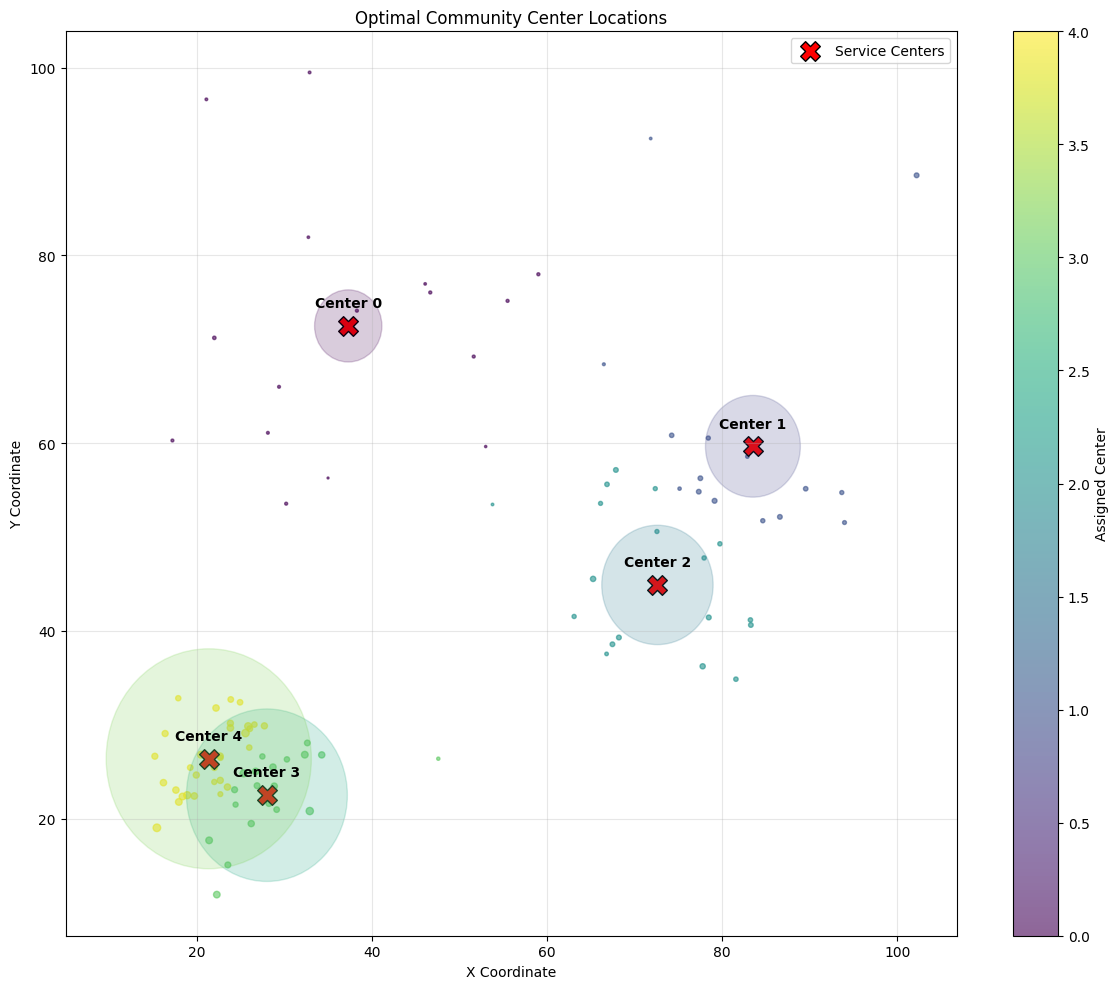

In [ ]:
# Run the algorithm and visualize results
def run_clustering_example():
    # Get data
    coordinates, population, num_centers = create_clustering_example()

    # Run clustering algorithm
    centers, assignments = clustering_based_service_locations(coordinates, num_centers, population)

    # Visualize the results
    plt.figure(figsize=(12, 10))

    # Plot population points, sized by population and colored by assigned center
    scatter = plt.scatter(
        coordinates[:, 0], coordinates[:, 1],
        s=population/50,  # Size by population
        c=assignments,    # Color by assignment
        cmap='viridis',
        alpha=0.6
    )

    # Plot service centers
    plt.scatter(
        centers[:, 0], centers[:, 1],
        s=200,
        c='red',
        marker='X',
        edgecolors='black',
        label='Service Centers'
    )

    # Add center labels
    for i, (x, y) in enumerate(centers):
        plt.text(x, y+2, f'Center {i}', ha='center', fontweight='bold')

    # Add a visual representation of population served
    for i in range(num_centers):
        mask = (assignments == i)
        pop_served = np.sum(population[mask])
        # Draw a circle proportional to population served
        pop_radius = np.sqrt(pop_served) / 15
        circle = plt.Circle(
            (centers[i, 0], centers[i, 1]),
            pop_radius,
            color=plt.cm.viridis(i/num_centers),
            alpha=0.2
        )
        plt.gca().add_patch(circle)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Optimal Community Center Locations')
    plt.grid(True, alpha=0.3)
    plt.colorbar(scatter, label='Assigned Center')
    plt.legend()

    # Print statistics for each center
    print("\nService Center Statistics:")
    print("Center | Population Served | # of Locations | Avg Distance")
    print("-------|-------------------|----------------|-------------")

    for i in range(num_centers):
        mask = (assignments == i)
        locations_served = np.sum(mask)
        pop_served = np.sum(population[mask])

        # Calculate average distance to center
        if locations_served > 0:
            center_dists = np.sqrt(np.sum((coordinates[mask] - centers[i])**2, axis=1))
            avg_dist = np.average(center_dists, weights=population[mask])
        else:
            avg_dist = 0

        print(f"{i:7d} | {pop_served:17.0f} | {locations_served:16d} | {avg_dist:11.2f}")

    plt.tight_layout()
    plt.show()

    return centers, assignments, coordinates, population

# Run the example
if __name__ == "__main__":
    centers, assignments, coordinates, population = run_clustering_example()

## Algorithm 3: Equity-Adjusted Program Access

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def equity_adjusted_scoring(scores, demographic_groups, adjustment_factor=0.1):
    """
    Adjust scores to reduce demographic disparities while maintaining ranking integrity.

    Args:
        scores: Original merit-based scores (higher is better)
        demographic_groups: Group indicator for each score (categorical)
        adjustment_factor: Strength of the adjustment (0 = no change, 1 = full equalization)

    Returns:
        adjusted_scores: Scores adjusted to reduce demographic disparities
        group_means: Mean scores by group before and after adjustment
    """
    print("Starting equity adjustment algorithm...")
    print(f"Adjustment factor: {adjustment_factor}")

    # Calculate global mean
    global_mean = np.mean(scores)
    print(f"Global mean score: {global_mean:.2f}")

    # Calculate group means
    unique_groups = np.unique(demographic_groups)
    group_means = {}

    print("Original group statistics:")
    for group in unique_groups:
        mask = (demographic_groups == group)
        group_mean = np.mean(scores[mask])
        group_count = np.sum(mask)
        group_means[group] = {
            'original_mean': group_mean,
            'count': group_count
        }
        print(f"  Group {group}: mean={group_mean:.2f}, count={group_count}")

    # Calculate adjustments
    print("Calculating adjustments...")
    adjustments = np.zeros_like(scores)
    for group in unique_groups:
        mask = (demographic_groups == group)
        group_diff = global_mean - group_means[group]['original_mean']
        adjustments[mask] = group_diff * adjustment_factor
        print(f"  Group {group}: adjustment={group_diff * adjustment_factor:.2f}")

    # Apply adjustments
    adjusted_scores = scores + adjustments

    # Calculate new group means
    print("Adjusted group statistics:")
    for group in unique_groups:
        mask = (demographic_groups == group)
        adjusted_mean = np.mean(adjusted_scores[mask])
        group_means[group]['adjusted_mean'] = adjusted_mean
        print(f"  Group {group}: adjusted mean={adjusted_mean:.2f}")

    # Calculate disparity reduction
    original_disparity = max([group_means[g]['original_mean'] for g in unique_groups]) - \
                        min([group_means[g]['original_mean'] for g in unique_groups])

    adjusted_disparity = max([group_means[g]['adjusted_mean'] for g in unique_groups]) - \
                        min([group_means[g]['adjusted_mean'] for g in unique_groups])

    disparity_reduction = (original_disparity - adjusted_disparity) / original_disparity * 100
    print(f"Disparity reduction: {disparity_reduction:.1f}%")

    print("Equity adjustment complete")
    return adjusted_scores, group_means



In [ ]:
# Create test data for equity adjustment
def create_equity_example():
    print("Creating test data for equity adjustment...")
    # Set random seed for reproducibility
    np.random.seed(42)

    # Create three demographic groups with different score distributions
    n_applicants = 300

    # Group A: Higher average scores
    group_a_scores = np.random.normal(80, 10, size=100)
    group_a_labels = np.array(['A'] * 100)

    # Group B: Medium average scores
    group_b_scores = np.random.normal(70, 10, size=100)
    group_b_labels = np.array(['B'] * 100)

    # Group C: Lower average scores
    group_c_scores = np.random.normal(60, 10, size=100)
    group_c_labels = np.array(['C'] * 100)

    # Combine into single arrays
    all_scores = np.concatenate([group_a_scores, group_b_scores, group_c_scores])
    all_groups = np.concatenate([group_a_labels, group_b_labels, group_c_labels])

    # Adjustment factor
    adjustment_factor = 0.5  # Start with medium adjustment

    print(f"Created {len(all_scores)} applicants from {len(np.unique(all_groups))} demographic groups")
    return all_scores, all_groups, adjustment_factor



Creating test data for equity adjustment...
Created 300 applicants from 3 demographic groups
Starting equity adjustment algorithm...
Adjustment factor: 0.5
Global mean score: 69.94
Original group statistics:
  Group A: mean=78.96, count=100
  Group B: mean=70.22, count=100
  Group C: mean=60.65, count=100
Calculating adjustments...
  Group A: adjustment=-4.51
  Group B: adjustment=-0.14
  Group C: adjustment=4.65
Adjusted group statistics:
  Group A: adjusted mean=74.45
  Group B: adjusted mean=70.08
  Group C: adjusted mean=65.30
Disparity reduction: 50.0%
Equity adjustment complete


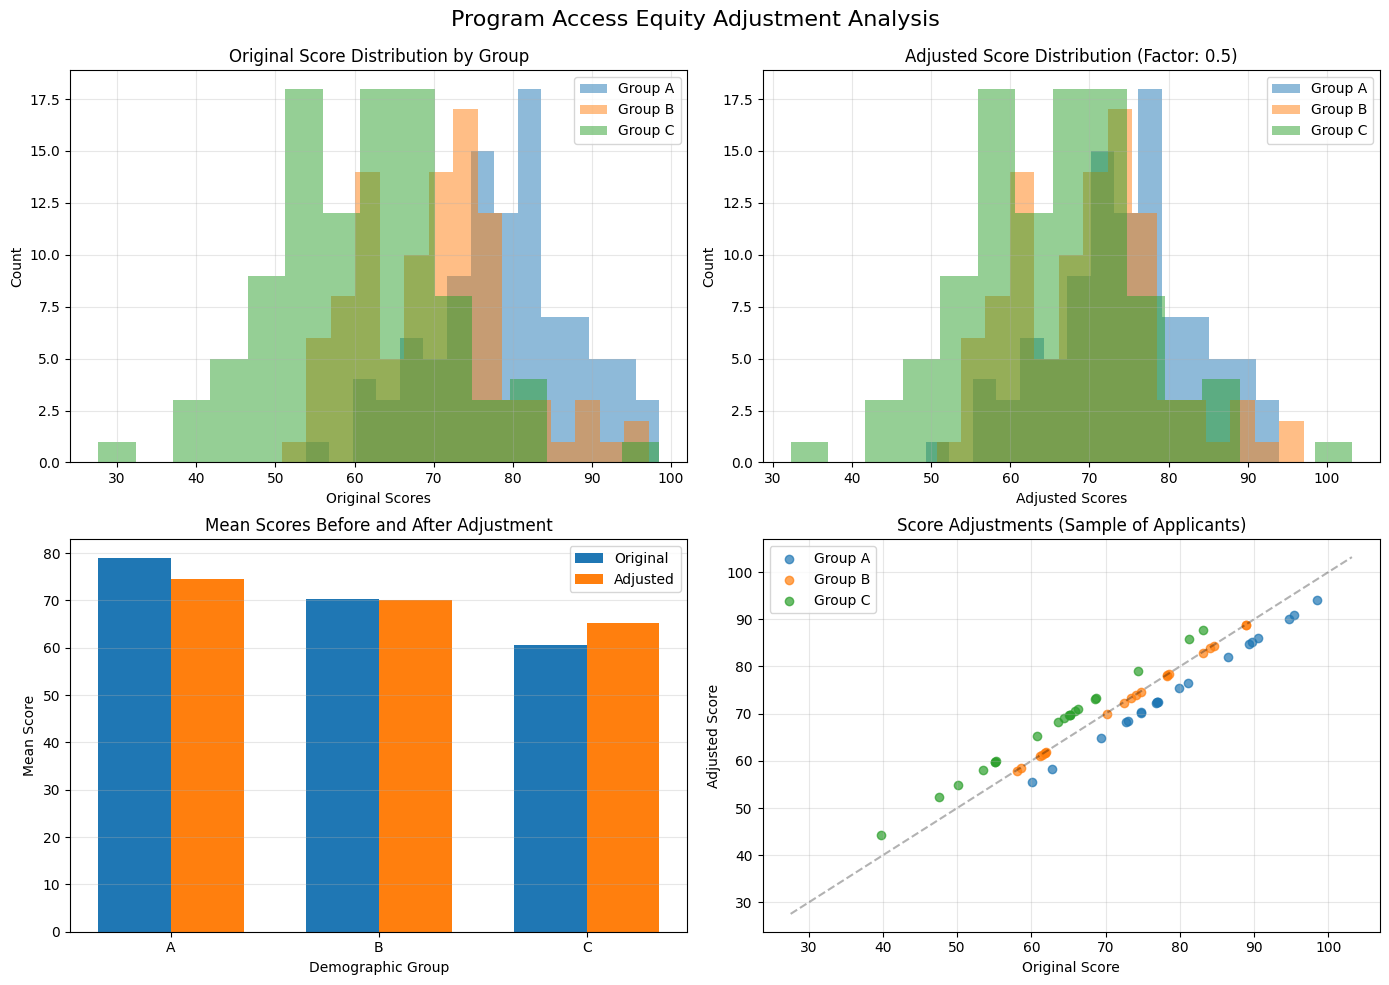


Program Access Analysis (Top 30% selected):
Original score threshold: 76.61
Adjusted score threshold: 74.83

Group representation in program:
Group | Original % | Adjusted % | Change
------|------------|------------|-------
A      |       62.0% |       48.0% |  -14.0%
B      |       22.0% |       26.0% |   +4.0%
C      |        6.0% |       16.0% |  +10.0%


In [ ]:
# Run the algorithm and visualize results
def run_equity_example():
    # Get data
    scores, demographic_groups, adjustment_factor = create_equity_example()

    # Run equity adjustment algorithm
    adjusted_scores, group_means = equity_adjusted_scoring(scores, demographic_groups, adjustment_factor)

    # Visualize the results
    plt.figure(figsize=(14, 10))

    # Plot 1: Original score distributions by group
    plt.subplot(2, 2, 1)
    groups = np.unique(demographic_groups)
    for group in groups:
        mask = (demographic_groups == group)
        plt.hist(scores[mask], alpha=0.5, bins=15, label=f'Group {group}')

    plt.xlabel('Original Scores')
    plt.ylabel('Count')
    plt.title('Original Score Distribution by Group')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 2: Adjusted score distributions by group
    plt.subplot(2, 2, 2)
    for group in groups:
        mask = (demographic_groups == group)
        plt.hist(adjusted_scores[mask], alpha=0.5, bins=15, label=f'Group {group}')

    plt.xlabel('Adjusted Scores')
    plt.ylabel('Count')
    plt.title(f'Adjusted Score Distribution (Factor: {adjustment_factor})')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 3: Group means before and after
    plt.subplot(2, 2, 3)
    group_list = list(groups)
    x = np.arange(len(group_list))
    width = 0.35

    original_means = [group_means[g]['original_mean'] for g in group_list]
    adjusted_means = [group_means[g]['adjusted_mean'] for g in group_list]

    plt.bar(x - width/2, original_means, width, label='Original')
    plt.bar(x + width/2, adjusted_means, width, label='Adjusted')

    plt.xlabel('Demographic Group')
    plt.ylabel('Mean Score')
    plt.title('Mean Scores Before and After Adjustment')
    plt.xticks(x, group_list)
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')

    # Plot 4: Score changes for a sample of applicants
    plt.subplot(2, 2, 4)

    # Select 20 random applicants from each group for clarity
    sampled_indices = []
    for group in groups:
        mask = (demographic_groups == group)
        indices = np.where(mask)[0]
        if len(indices) > 20:
            indices = np.random.choice(indices, 20, replace=False)
        sampled_indices.extend(indices)

    sampled_indices = np.array(sampled_indices)

    # Create scatter plot of original vs adjusted scores
    for group in groups:
        mask = (demographic_groups[sampled_indices] == group)
        plt.scatter(
            scores[sampled_indices][mask],
            adjusted_scores[sampled_indices][mask],
            alpha=0.7,
            label=f'Group {group}'
        )

    # Add the y=x line
    min_score = min(np.min(scores), np.min(adjusted_scores))
    max_score = max(np.max(scores), np.max(adjusted_scores))
    plt.plot([min_score, max_score], [min_score, max_score], 'k--', alpha=0.3)

    plt.xlabel('Original Score')
    plt.ylabel('Adjusted Score')
    plt.title('Score Adjustments (Sample of Applicants)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.suptitle('Program Access Equity Adjustment Analysis', fontsize=16)
    plt.subplots_adjust(top=0.92)
    plt.show()

    # Calculate and print additional metrics
    threshold = np.percentile(scores, 70)  # Top 30% get into program
    adjusted_threshold = np.percentile(adjusted_scores, 70)

    print("\nProgram Access Analysis (Top 30% selected):")
    print(f"Original score threshold: {threshold:.2f}")
    print(f"Adjusted score threshold: {adjusted_threshold:.2f}")

    print("\nGroup representation in program:")
    print("Group | Original % | Adjusted % | Change")
    print("------|------------|------------|-------")

    for group in groups:
        mask = (demographic_groups == group)
        original_selected = np.sum((scores[mask] >= threshold)) / np.sum(mask) * 100
        adjusted_selected = np.sum((adjusted_scores[mask] >= adjusted_threshold)) / np.sum(mask) * 100
        change = adjusted_selected - original_selected

        print(f"{group:6s} | {original_selected:10.1f}% | {adjusted_selected:10.1f}% | {change:+6.1f}%")

    return adjusted_scores, scores, demographic_groups, group_means

# Run the example
if __name__ == "__main__":
    adjusted_scores, original_scores, groups, group_means = run_equity_example()

# Reflection Questions:
1. Summarize the key findings from your analysis. What do the results suggest about how the county should allocate the resources?

 -> Algorithm 1 distributes \$10 million across neighborhoods based on economic need, population size, and accessibility.The findings show a strong linear relationship between need scores and overall financing, with Location 2, which has the lowest need score (0.20), receiving \$1.2 million and Location 3, which has the greatest need score (0.70), receiving the maximum allocation of \$2.8 million.  On the other hand, discrepancies are seen when looking at the distribution per capita. At \$4,000 per 1,000 residents, Location 2 has the most per capita funding despite having the lowest need, whereas Location 3, which has the largest need, only receives \$2,300 per 1,000 residents. This means that, despite having the greatest need, larger neighborhoods receive less funding per person than smaller ones. The county must decide whether to prioritize total funding based on need or adjust for population size to ensure a fair per capita distribution. If per capita fairness is preferred, the algorithm should be modified to balance both total need and population size for a more reasonable allocation.


2. Optimizing Resource Allocations:  
   1. Which areas have the highest population density? The lowest?

      -> The highest population density is concentrated around Center 4,  indicating it is located in a densely populated urban area and the lowest being Center 0, suggesting it is in a more sparsely populated or rural region.
      
   2. Which center serves the most people? The fewest? Why might this matter in policy decisions?

     -> With 30,886 individuals served, Centre 4 is the most used, while Centre 0 serves the fewest, with 3,324 residents.  This means that although Centre 0 may be underutilised, raising questions about whether it is in the best location or whether accessibility issues are restricting its use, Centre 4 may be overloaded, resulting in higher wait times and stretched resources.These differences emphasise the necessity of a fair resource distribution strategy from a policy standpoint.  While underutilised centres like Centre 0 might benefit from better transportation or relocation to better serve the community, overcrowded centres like Centre 4 might need more money, employees, or space to meet demand.

3. Accessibility of Service Centres:  
   1. Which population points are furthest from their assigned centres? What challenges might this create?  

      -> The rural population points, primarily served by Centre 0, are the furthest from their assigned center. These areas likely lack a robust public transportation system where residents are mostly relying on personal vehicles or rides from others to access services. This can be costly, time-consuming, and unreliable, particularly for individuals with limited financial resources, disabilities, or other mobility challenges. As a result, residents in these remote locations may have difficulty accessing essential services like health/food assistance, education programs, and job support, which could limit their opportunities and well-being. Without nearby centres, they are dependent on friends or family for transportation. Over time, these challenges can widen the gap between rural and urban communities, making it harder for those in remote areas to get the help they need.

   2. Are there any population areas that appear underserved by this distribution?

      -> Yes, the areas above a y-coordinate of approximately 85 looks like the rural outskirts of the county that seem to be underserved. The distances to the closest centre are significantly greater in these areas.  Residents in these neglected areas may thus encounter difficulties in obtaining necessary services or transportation assistance.

4. Modifying the Algorithm:  
   1. How would the results change if you weighted certain conditions differently? Try it and see.  

      -> The 80-20 weighting effectively prioritizes high-need areas while maintaining accessibility considerations, ensuring a strong correlation between need and allocated resources.Location 3 (highest need is 0.70) received the largest share, while Location 2 (lowest need is 0.20) received the least.The per capita distribution remained relatively balanced, though high-population areas received slightly lower per capita allocations. This shift strengthened the correlation between need and funding (0.9944) while maintaining accessibility considerations, ensuring a fair yet efficient resource distribution.
      
      Below is the modified code and its output.

In [1]:
# Modified code where the weight is changed to 80:20 for needs and accessibility
import numpy as np
import matplotlib.pyplot as plt

def optimal_resource_allocation(resources, needs, distances, max_distance=None):
    """
    Allocate limited resources to locations based on need and accessibility.

    Args:
        resources: Total resources available to distribute
        needs: Array of needs per location (higher = more needed)
        distances: Matrix of distances between locations
        max_distance: Maximum service distance (optional)

    Returns:
        allocations: Array of allocated resources per location
    """
    print("Starting resource allocation algorithm...")
    n_locations = len(needs)

    # Normalize needs to sum to 1
    normalized_needs = needs / np.sum(needs)
    print(f"Normalized needs: min={normalized_needs.min():.4f}, max={normalized_needs.max():.4f}")

    # Calculate accessibility scores
    if max_distance is None:
        max_distance = np.median(distances)
        print(f"Using median distance ({max_distance:.2f}) as max_distance parameter")

    accessibility = np.zeros(n_locations)
    for i in range(n_locations):
        # Create a copy of the distances to avoid modifying the original
        dist_i = distances[i].copy()
        # Set self-distance to a very large number instead of infinity
        dist_i[i] = 9999999  # This avoids the infinity issue
        weight = np.exp(-dist_i / max_distance)
        accessibility[i] = np.sum(weight)

    # Normalize accessibility
    accessibility = accessibility / np.sum(accessibility)
    print(f"Accessibility scores: min={accessibility.min():.4f}, max={accessibility.max():.4f}")

    #**Combine needs and accessibility (80% needs, 20% accessibility)**
    combined_score = 0.8 * normalized_needs + 0.2 * accessibility
    combined_score = combined_score / np.sum(combined_score)

    # Allocate resources
    allocations = resources * combined_score

    # Round to integers
    allocations = np.round(allocations).astype(int)
    print(f"Initial allocation: {np.sum(allocations)} of {resources} resources")

    # Adjust for rounding errors
    diff = resources - np.sum(allocations)
    if diff > 0:
        # Allocate remaining resources to highest-need locations
        indices = np.argsort(normalized_needs)[::-1]
        for i in range(diff):
            allocations[indices[i % n_locations]] += 1
        print(f"Added {diff} remaining resources to highest-need locations")
    elif diff < 0:
        # Remove from lowest-need locations
        indices = np.argsort(normalized_needs)
        for i in range(abs(diff)):
            if allocations[indices[i % n_locations]] > 0:
                allocations[indices[i % n_locations]] -= 1
        print(f"Removed {abs(diff)} excess resources from lowest-need locations")

    print("Resource allocation complete")
    return allocations



In [2]:
# Create test data for resource allocation
def create_allocation_example():
    print("Creating test data for resource allocation...")
    # Create 5 locations with varying needs
    n_locations = 5

    # Population at each location
    population = np.array([5000, 8000, 3000, 12000, 7000])

    # Need score (e.g., poverty rate from 0-1)
    need_scores = np.array([0.3, 0.5, 0.2, 0.7, 0.4])

    # Distance matrix between locations (in miles)
    distances = np.array([
        [0, 10, 15, 25, 20],  # Distances from location 0 to all others
        [10, 0, 12, 18, 15],  # Distances from location 1 to all others
        [15, 12, 0, 30, 10],  # Distances from location 2 to all others
        [25, 18, 30, 0, 12],  # Distances from location 3 to all others
        [20, 15, 10, 12, 0]   # Distances from location 4 to all others
    ])

    # Total resources to allocate (e.g., $10 million in community development funds)
    total_resources = 100

    print(f"Created data for {n_locations} locations with ${total_resources} to allocate")
    return population, need_scores, distances, total_resources



Creating test data for resource allocation...
Created data for 5 locations with $100 to allocate
Starting resource allocation algorithm...
Normalized needs: min=0.0952, max=0.3333
Using median distance (12.00) as max_distance parameter
Accessibility scores: min=0.1426, max=0.2346
Initial allocation: 101 of 100 resources
Removed 1 excess resources from lowest-need locations
Resource allocation complete


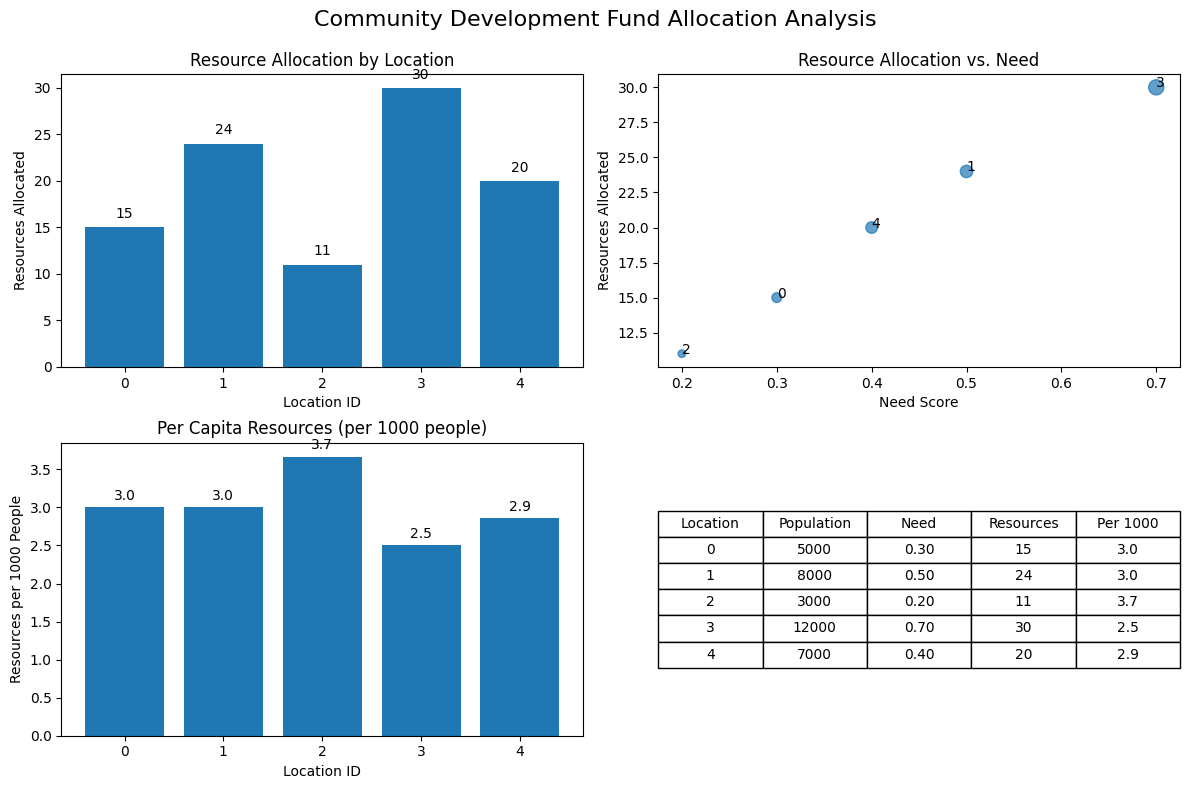


Allocation Summary:
Total Resources Allocated: 100
Correlation with Need Score: 0.9944
Per Capita Range: 2.50 to 3.67


In [3]:
# Run the algorithm and visualize results
def run_allocation_example():
    # Get data
    population, need_scores, distances, total_resources = create_allocation_example()

    # Run allocation algorithm
    allocations = optimal_resource_allocation(total_resources, need_scores, distances)

    # Calculate per capita allocation for analysis
    per_capita = allocations / population * 1000  # Resources per 1000 people

    # Visualize results
    plt.figure(figsize=(12, 8))

    # Plot 1: Allocation by location
    plt.subplot(2, 2, 1)
    plt.bar(range(len(allocations)), allocations)
    plt.title('Resource Allocation by Location')
    plt.xlabel('Location ID')
    plt.ylabel('Resources Allocated')
    plt.xticks(range(len(allocations)))
    for i, v in enumerate(allocations):
        plt.text(i, v+1, str(v), ha='center')

    # Plot 2: Resources vs Need
    plt.subplot(2, 2, 2)
    plt.scatter(need_scores, allocations, s=population/100, alpha=0.7)
    plt.title('Resource Allocation vs. Need')
    plt.xlabel('Need Score')
    plt.ylabel('Resources Allocated')
    for i, txt in enumerate(range(len(allocations))):
        plt.annotate(txt, (need_scores[i], allocations[i]))

    # Plot 3: Per capita resources
    plt.subplot(2, 2, 3)
    plt.bar(range(len(per_capita)), per_capita)
    plt.title('Per Capita Resources (per 1000 people)')
    plt.xlabel('Location ID')
    plt.ylabel('Resources per 1000 People')
    plt.xticks(range(len(per_capita)))
    for i, v in enumerate(per_capita):
        plt.text(i, v+0.1, f"{v:.1f}", ha='center')

    # Plot 4: Table of values
    plt.subplot(2, 2, 4)
    plt.axis('off')
    table_data = [
        ["Location", "Population", "Need", "Resources", "Per 1000"],
    ]
    for i in range(len(allocations)):
        table_data.append([
            f"{i}",
            f"{population[i]}",
            f"{need_scores[i]:.2f}",
            f"{allocations[i]}",
            f"{per_capita[i]:.1f}"
        ])
    table = plt.table(cellText=table_data, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    plt.tight_layout()
    plt.suptitle('Community Development Fund Allocation Analysis', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

    # Print summary statistics
    print("\nAllocation Summary:")
    print(f"Total Resources Allocated: {np.sum(allocations)}")
    print(f"Correlation with Need Score: {np.corrcoef(need_scores, allocations)[0,1]:.4f}")
    print(f"Per Capita Range: {np.min(per_capita):.2f} to {np.max(per_capita):.2f}")

    return allocations, population, need_scores

# Run the example
if __name__ == "__main__":
    allocations, population, need_scores = run_allocation_example()

2. What happens if we reduce the number of centers from 5 to 3? Where are the centers placed? At what point does adding more centers produce diminishing returns?

    ->   Travel distances increased when the number of service centres was reduced from five to three, particularly for rural areas. Centre 2 covered just 3,670 people, yet it had the greatest average distance (17.75 units).  While low-density regions faces accessibility challenges, high-density areas remain well-served.  Although fewer centres increase efficiency, they restrict access for residents in rural areas.  Although the benefits of adding more than 5 centres will diminish, one more centre in a rural location could increase accessibility without incurring excessive costs.

In [1]:
# When number of centres is changed to 3
import numpy as np
import matplotlib.pyplot as plt

def clustering_based_service_locations(coordinates, num_centers, population_weights=None):
    """
    Find optimal service center locations using weighted k-means clustering.

    Args:
        coordinates: Array of coordinates for population points
        num_centers: Number of service centers to place
        population_weights: Weights for each coordinate

    Returns:
        center_locations: Coordinates of the recommended service centers
        assignments: Assigned center for each input coordinate
    """
    print("Starting service location clustering algorithm...")
    n_points = coordinates.shape[0]

    # If no weights provided, use equal weights
    if population_weights is None:
        print("No population weights provided. Using equal weights.")
        population_weights = np.ones(n_points)
    else:
        print(f"Using population weights (min={min(population_weights):.1f}, max={max(population_weights):.1f})")

    # Normalize weights
    weights = population_weights / np.sum(population_weights)

    # Initialize centers randomly
    np.random.seed(42)  # For reproducibility
    idx = np.random.choice(n_points, num_centers, replace=False)
    centers = coordinates[idx].copy()
    print(f"Initialized {num_centers} random center locations")

    # K-means iterations
    max_iterations = 100
    tolerance = 1e-4

    for iteration in range(max_iterations):
        # Calculate distances to centers
        distances = np.zeros((n_points, num_centers))
        for i in range(num_centers):
            distances[:, i] = np.sum((coordinates - centers[i])**2, axis=1)

        # Assign points to nearest center
        assignments = np.argmin(distances, axis=1)

        # Update centers
        new_centers = np.zeros_like(centers)
        for i in range(num_centers):
            mask = (assignments == i)
            if np.sum(mask) > 0:
                # Weighted average of points
                new_centers[i] = np.average(
                    coordinates[mask],
                    axis=0,
                    weights=weights[mask]
                )

        # Check convergence
        center_shift = np.sum((centers - new_centers)**2)
        centers = new_centers

        if center_shift < tolerance:
            print(f"Converged after {iteration+1} iterations")
            break

    print("Service center location optimization complete")
    return centers, assignments



In [2]:
# Create test data for service center placement
def create_clustering_example():
    print("Creating test data for service center placement...")
    # Set random seed for reproducibility
    np.random.seed(42)

    # Create three clusters of population points
    n_points = 100

    # Cluster 1: Dense urban area
    urban_x = np.random.normal(25, 5, size=50)
    urban_y = np.random.normal(25, 5, size=50)
    urban_pop = np.random.normal(1000, 200, size=50)  # Higher population

    # Cluster 2: Suburban area
    suburban_x = np.random.normal(75, 10, size=30)
    suburban_y = np.random.normal(50, 10, size=30)
    suburban_pop = np.random.normal(500, 100, size=30)  # Medium population

    # Cluster 3: Rural area
    rural_x = np.random.normal(40, 15, size=20)
    rural_y = np.random.normal(75, 15, size=20)
    rural_pop = np.random.normal(200, 50, size=20)  # Lower population

    # Combine into single arrays
    x_coords = np.concatenate([urban_x, suburban_x, rural_x])
    y_coords = np.concatenate([urban_y, suburban_y, rural_y])
    population = np.concatenate([urban_pop, suburban_pop, rural_pop])

    # Create coordinates array
    coordinates = np.column_stack([x_coords, y_coords])

    # **Changed Number of service centers to place from 5 to 3**
    num_centers = 3

    print(f"Created {len(coordinates)} population points and will place {num_centers} centers")
    return coordinates, population, num_centers



Creating test data for service center placement...
Created 100 population points and will place 3 centers
Starting service location clustering algorithm...
Using population weights (min=102.4, max=1492.6)
Initialized 3 random center locations
Converged after 7 iterations
Service center location optimization complete

Service Center Statistics:
Center | Population Served | # of Locations | Avg Distance
-------|-------------------|----------------|-------------
      0 |             49886 |               51 |        5.90
      1 |             15358 |               31 |       12.00
      2 |              3670 |               18 |       17.75


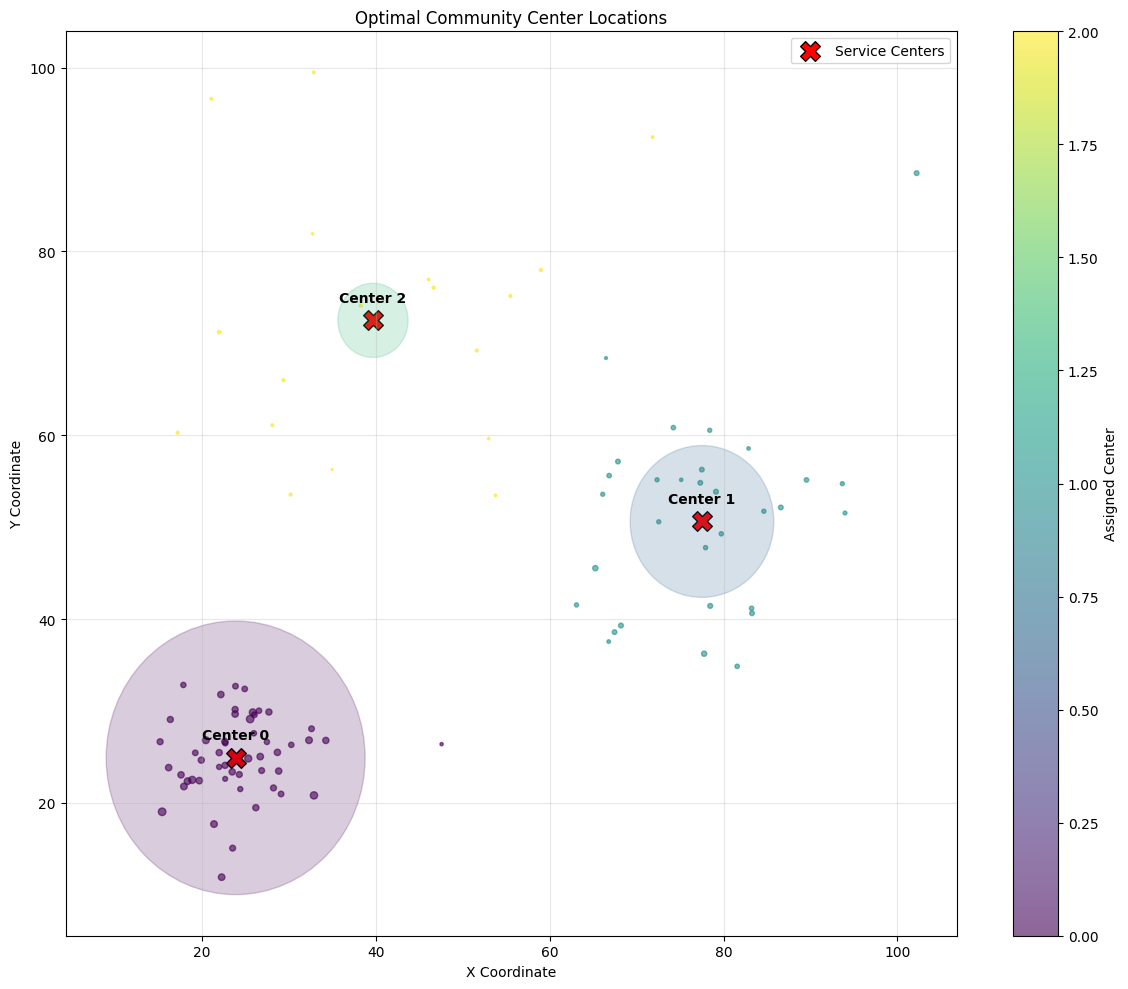

In [3]:
# Run the algorithm and visualize results
def run_clustering_example():
    # Get data
    coordinates, population, num_centers = create_clustering_example()

    # Run clustering algorithm
    centers, assignments = clustering_based_service_locations(coordinates, num_centers, population)

    # Visualize the results
    plt.figure(figsize=(12, 10))

    # Plot population points, sized by population and colored by assigned center
    scatter = plt.scatter(
        coordinates[:, 0], coordinates[:, 1],
        s=population/50,  # Size by population
        c=assignments,    # Color by assignment
        cmap='viridis',
        alpha=0.6
    )

    # Plot service centers
    plt.scatter(
        centers[:, 0], centers[:, 1],
        s=200,
        c='red',
        marker='X',
        edgecolors='black',
        label='Service Centers'
    )

    # Add center labels
    for i, (x, y) in enumerate(centers):
        plt.text(x, y+2, f'Center {i}', ha='center', fontweight='bold')

    # Add a visual representation of population served
    for i in range(num_centers):
        mask = (assignments == i)
        pop_served = np.sum(population[mask])
        # Draw a circle proportional to population served
        pop_radius = np.sqrt(pop_served) / 15
        circle = plt.Circle(
            (centers[i, 0], centers[i, 1]),
            pop_radius,
            color=plt.cm.viridis(i/num_centers),
            alpha=0.2
        )
        plt.gca().add_patch(circle)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Optimal Community Center Locations')
    plt.grid(True, alpha=0.3)
    plt.colorbar(scatter, label='Assigned Center')
    plt.legend()

    # Print statistics for each center
    print("\nService Center Statistics:")
    print("Center | Population Served | # of Locations | Avg Distance")
    print("-------|-------------------|----------------|-------------")

    for i in range(num_centers):
        mask = (assignments == i)
        locations_served = np.sum(mask)
        pop_served = np.sum(population[mask])

        # Calculate average distance to center
        if locations_served > 0:
            center_dists = np.sqrt(np.sum((coordinates[mask] - centers[i])**2, axis=1))
            avg_dist = np.average(center_dists, weights=population[mask])
        else:
            avg_dist = 0

        print(f"{i:7d} | {pop_served:17.0f} | {locations_served:16d} | {avg_dist:11.2f}")

    plt.tight_layout()
    plt.show()

    return centers, assignments, coordinates, population

# Run the example
if __name__ == "__main__":
    centers, assignments, coordinates, population = run_clustering_example()

3. What happens if we remove population weighting and treat all points equally? How does this affect service equity vs. efficiency?

  Below is the code where the number of centres was set back to 5 and the population was removed followed by its output and interpretion.

In [4]:
# Create test data for service center placement
def create_clustering_example():
    print("Creating test data for service center placement...")
    # Set random seed for reproducibility
    np.random.seed(42)

    # Create three clusters of population points
    n_points = 100

    # Cluster 1: Dense urban area
    urban_x = np.random.normal(25, 5, size=50)
    urban_y = np.random.normal(25, 5, size=50)
    urban_pop = np.random.normal(1000, 200, size=50)  # Higher population

    # Cluster 2: Suburban area
    suburban_x = np.random.normal(75, 10, size=30)
    suburban_y = np.random.normal(50, 10, size=30)
    suburban_pop = np.random.normal(500, 100, size=30)  # Medium population

    # Cluster 3: Rural area
    rural_x = np.random.normal(40, 15, size=20)
    rural_y = np.random.normal(75, 15, size=20)
    rural_pop = np.random.normal(200, 50, size=20)  # Lower population

    # Combine into single arrays
    x_coords = np.concatenate([urban_x, suburban_x, rural_x])
    y_coords = np.concatenate([urban_y, suburban_y, rural_y])
    population = np.concatenate([urban_pop, suburban_pop, rural_pop])

    # Create coordinates array
    coordinates = np.column_stack([x_coords, y_coords])

    # Number of service centers to place
    num_centers = 5

    print(f"Created {len(coordinates)} population points and will place {num_centers} centers")
    return coordinates, population, num_centers



Creating test data for service center placement...
Created 100 population points and will place 5 centers
Starting service location clustering algorithm...
No population weights provided. Using equal weights.
Initialized 5 random center locations
Converged after 4 iterations
Service center location optimization complete

Service Center Statistics:
Center | Population Served | # of Locations | Avg Distance
-------|-------------------|----------------|-------------
      0 |              3357 |               16 |       17.32
      1 |             10072 |               20 |       10.88
      2 |              5599 |               13 |        8.74
      3 |             15647 |               17 |        5.01
      4 |             34239 |               34 |        4.77


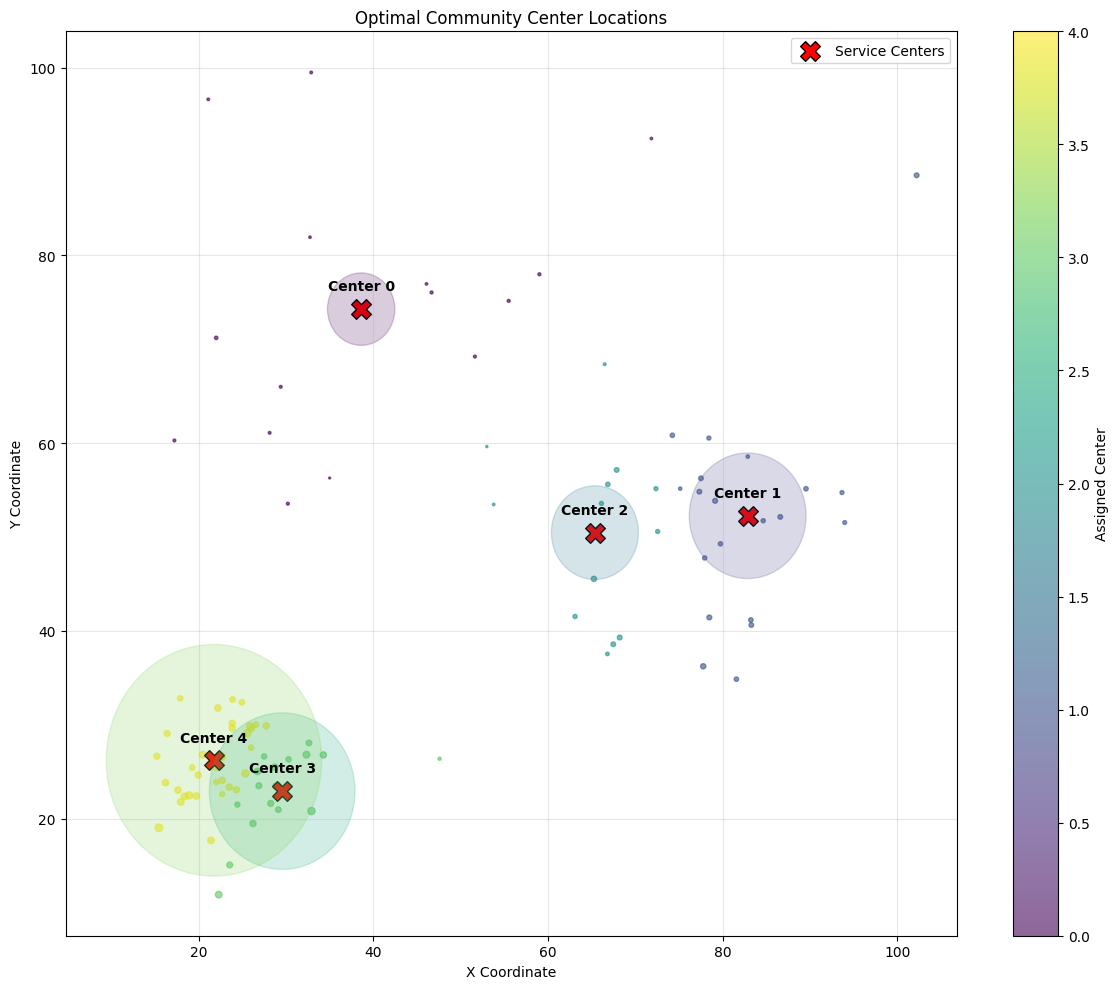

In [5]:
# Run the algorithm and visualize results
def run_clustering_example():
    # Get data
    coordinates, population, num_centers = create_clustering_example()

    # Run clustering algorithm with no population
    centers, assignments = clustering_based_service_locations(coordinates, num_centers)

    # Visualize the results
    plt.figure(figsize=(12, 10))

    # Plot population points, sized by population and colored by assigned center
    scatter = plt.scatter(
        coordinates[:, 0], coordinates[:, 1],
        s=population/50,  # Size by population
        c=assignments,    # Color by assignment
        cmap='viridis',
        alpha=0.6
    )

    # Plot service centers
    plt.scatter(
        centers[:, 0], centers[:, 1],
        s=200,
        c='red',
        marker='X',
        edgecolors='black',
        label='Service Centers'
    )

    # Add center labels
    for i, (x, y) in enumerate(centers):
        plt.text(x, y+2, f'Center {i}', ha='center', fontweight='bold')

    # Add a visual representation of population served
    for i in range(num_centers):
        mask = (assignments == i)
        pop_served = np.sum(population[mask])
        # Draw a circle proportional to population served
        pop_radius = np.sqrt(pop_served) / 15
        circle = plt.Circle(
            (centers[i, 0], centers[i, 1]),
            pop_radius,
            color=plt.cm.viridis(i/num_centers),
            alpha=0.2
        )
        plt.gca().add_patch(circle)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Optimal Community Center Locations')
    plt.grid(True, alpha=0.3)
    plt.colorbar(scatter, label='Assigned Center')
    plt.legend()

    # Print statistics for each center
    print("\nService Center Statistics:")
    print("Center | Population Served | # of Locations | Avg Distance")
    print("-------|-------------------|----------------|-------------")

    for i in range(num_centers):
        mask = (assignments == i)
        locations_served = np.sum(mask)
        pop_served = np.sum(population[mask])

        # Calculate average distance to center
        if locations_served > 0:
            center_dists = np.sqrt(np.sum((coordinates[mask] - centers[i])**2, axis=1))
            avg_dist = np.average(center_dists, weights=population[mask])
        else:
            avg_dist = 0

        print(f"{i:7d} | {pop_served:17.0f} | {locations_served:16d} | {avg_dist:11.2f}")

    plt.tight_layout()
    plt.show()

    return centers, assignments, coordinates, population

# Run the example
if __name__ == "__main__":
    centers, assignments, coordinates, population = run_clustering_example()

  The distribution of the people that service centres serve is considerably changed when population weighting is removed, but the locations of service centres remain largely unchanged.  In urban and suburban areas, service demand shifts between centers, leading to some centers becoming overburdened while others are underutilized.  For instance, the gap between the most and least used centres grows considerably in urban areas, whereas the difference in population served between two centres increases in suburban areas.  Due to the possibility of congestion in high-density centres and underutilisation of resources in lower-density locations, which lowers overall efficiency, this imbalance raises concerns about service quality and equity.
